In [1]:
import yfinance as yf
from datetime import datetime, timedelta

In [2]:
end_date = datetime.now()
start_date = end_date - timedelta(days = 365 * 10)
google_data = yf.download('GOOGL', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [3]:
google_data.tail()

Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,
2025-01-08,193.949997,196.289993,192.380005,192.570007,24864800
2025-01-10,192.039993,196.520004,190.309998,194.300003,26665200
2025-01-13,191.009995,191.179993,187.360001,190.070007,21823700
2025-01-14,189.660004,191.979996,188.309998,191.240005,17174900
2025-01-15,195.550003,196.360001,191.860001,193.089996,21752900


In [4]:
google_data.columns = google_data.columns.droplevel(1)

In [5]:
google_data.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2015-01-20,25.404905,25.687382,25.376509,25.545895,46796000
2015-01-21,25.925518,25.998254,25.387468,25.449742,46356000
2015-01-22,26.767963,26.844685,26.001244,26.055546,56068000
2015-01-23,26.999622,27.171998,26.690743,26.804331,45966000
2015-01-26,26.739069,26.977206,26.507409,26.977206,30932000


In [6]:
google_data.shape

(2514, 5)

In [7]:
google_data.index

DatetimeIndex(['2015-01-20', '2015-01-21', '2015-01-22', '2015-01-23',
               '2015-01-26', '2015-01-27', '2015-01-28', '2015-01-29',
               '2015-01-30', '2015-02-02',
               ...
               '2024-12-31', '2025-01-02', '2025-01-03', '2025-01-06',
               '2025-01-07', '2025-01-08', '2025-01-10', '2025-01-13',
               '2025-01-14', '2025-01-15'],
              dtype='datetime64[ns]', name='Date', length=2514, freq=None)

In [8]:
import pandas as pd
google_data.index = pd.to_datetime(google_data.index)
train_data = google_data[google_data.index.year < 2024]
test_data = google_data[google_data.index.year == 2024]

In [9]:
train_data.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2015-01-20,25.404905,25.687382,25.376509,25.545895,46796000
2015-01-21,25.925518,25.998254,25.387468,25.449742,46356000
2015-01-22,26.767963,26.844685,26.001244,26.055546,56068000
2015-01-23,26.999622,27.171998,26.690743,26.804331,45966000
2015-01-26,26.739069,26.977206,26.507409,26.977206,30932000


In [10]:
test_data

Price,Close,High,Low,Open,Volume
Date,,,,,
2024-01-02,137.670929,138.946304,135.987031,138.049561,23711200
2024-01-03,138.418228,139.125670,136.584878,136.754262,24212100
2024-01-04,135.897369,138.657369,135.857521,137.920036,27137700
2024-01-05,135.239731,136.664573,134.661824,136.256051,22506000
2024-01-08,138.338516,138.507900,135.767833,135.797724,21404000
...,...,...,...,...,...
2024-12-24,196.110001,196.110001,193.779999,194.839996,10403300
2024-12-26,195.600006,196.750000,194.380005,195.149994,12046600
2024-12-27,192.759995,195.320007,190.649994,194.949997,18891400


In [11]:
train_data.shape

(2253, 5)

In [12]:
training_set = train_data.iloc[:, 3:4].values

In [13]:
training_set

array([[ 25.5458947 ],
       [ 25.44974186],
       [ 26.05554584],
       ...,
       [141.07857063],
       [140.27149665],
       [139.12565922]])

In [14]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [15]:
training_set_scaled

array([[7.67663070e-04],
       [0.00000000e+00],
       [4.83660546e-03],
       ...,
       [9.23155087e-01],
       [9.16711586e-01],
       [9.07563473e-01]])

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
training_set_scaled.shape

(2253, 1)

In [18]:
X_train = []
y_train = []
time_step = 120
for i in range(time_step, training_set_scaled.shape[0]):
    X_train.append(training_set_scaled[i - time_step : i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [19]:
X_train

array([[7.67663070e-04, 0.00000000e+00, 4.83660546e-03, ...,
        1.38257082e-02, 1.50388277e-02, 1.70514015e-02],
       [0.00000000e+00, 4.83660546e-03, 1.08147424e-02, ...,
        1.50388277e-02, 1.70514015e-02, 1.93583572e-02],
       [4.83660546e-03, 1.08147424e-02, 1.21949374e-02, ...,
        1.70514015e-02, 1.93583572e-02, 2.53206012e-02],
       ...,
       [7.52203396e-01, 7.37884567e-01, 7.21895157e-01, ...,
        9.06449762e-01, 9.16632113e-01, 9.23155115e-01],
       [7.37884567e-01, 7.21895157e-01, 7.41862045e-01, ...,
        9.16632113e-01, 9.23155115e-01, 9.23155087e-01],
       [7.21895157e-01, 7.41862045e-01, 7.58806047e-01, ...,
        9.23155115e-01, 9.23155087e-01, 9.16711586e-01]])

In [20]:
y_train

array([0.01935836, 0.0253206 , 0.02899577, ..., 0.92315509, 0.91671159,
       0.90756347])

In [21]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) 

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

import warnings
warnings.filterwarnings('ignore')

In [23]:
regressor = Sequential()

In [24]:
regressor.add(LSTM(units = 70, return_sequences=True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [25]:
regressor.add(LSTM(units = 70, return_sequences=True))
regressor.add(Dropout(0.2))

In [26]:
regressor.add(LSTM(units = 70, return_sequences=True))
regressor.add(Dropout(0.2))

In [27]:
regressor.add(LSTM(units = 70))
regressor.add(Dropout(0.2))

In [28]:
regressor.add(Dense(units = 1))

In [29]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [30]:
regressor.fit(X_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 30s 286ms/step - loss: 0.0488
Epoch 2/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 19s 279ms/step - loss: 0.0045
Epoch 3/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 19s 279ms/step - loss: 0.0035
Epoch 4/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 20s 292ms/step - loss: 0.0029
Epoch 5/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 19s 282ms/step - loss: 0.0030
Epoch 6/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 19s 289ms/step - loss: 0.0027
Epoch 7/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 19s 284ms/step - loss: 0.0028
Epoch 8/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 20s 296ms/step - loss: 0.0022
Epoch 9/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 20s 291ms/step - loss: 0.0025
Epoch 10/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 19s 287ms/step - loss: 0.0028
Epoch 11/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 19s 277ms/step - loss: 0.0022
Epoch 12/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 20s 291ms/step - loss: 0.0023
Epoch 13/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 20s 292ms/step - loss: 0.0020
Epoch 14/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 19s 282ms/step - loss: 0.0018
Epoch 15/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 18s 

In [31]:
test_data.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2024-01-02,137.670929,138.946304,135.987031,138.049561,23711200
2024-01-03,138.418228,139.125670,136.584878,136.754262,24212100
2024-01-04,135.897369,138.657369,135.857521,137.920036,27137700
2024-01-05,135.239731,136.664573,134.661824,136.256051,22506000
2024-01-08,138.338516,138.507900,135.767833,135.797724,21404000


In [32]:
real_stock_price = test_data.iloc[:, 3:4].values

In [33]:
dataset_total  = pd.concat((train_data['Open'], test_data['Open']), axis = 0)
dataset_total

Date
2015-01-20     25.545895
2015-01-21     25.449742
2015-01-22     26.055546
2015-01-23     26.804331
2015-01-26     26.977206
                 ...    
2024-12-24    194.839996
2024-12-26    195.149994
2024-12-27    194.949997
2024-12-30    189.800003
2024-12-31    191.080002
Name: Open, Length: 2505, dtype: float64

In [34]:
testing_set = test_data.iloc[:,3:4].values

In [35]:
inputs = dataset_total[len(dataset_total) - len(testing_set) - time_step:].values

In [36]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [37]:
X_train = []
for i in range(time_step, inputs.shape[0]):
    X_train.append(inputs[i - time_step:i, 0])
X_train = np.array(X_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
predicted_stock_price = regressor.predict(X_train)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 247ms/step


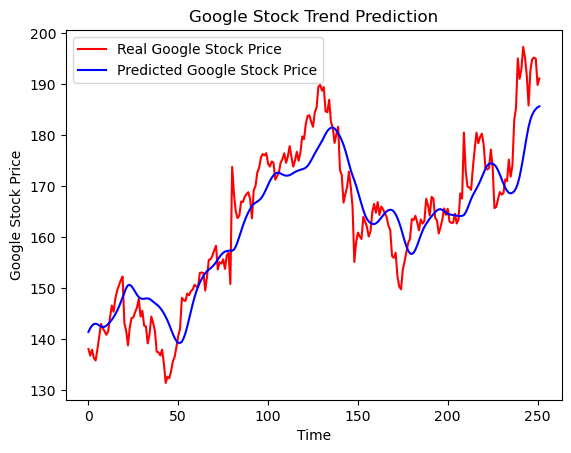

In [78]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Trend Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()